In [1]:
import pyNab as Nab
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileDirectory = 'F:\\ManitobaData\\'
filenames = []
filenames.append(fileDirectory + 'ScopeRun398_1.scope')

In [3]:
waveformFile = Nab.wf.waveformFile(filenames)

In [8]:
results = waveformFile.determineEnergyTiming(method='trap', params=[1250, 40, 1250], batchsize=10000)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [01:51<00:00,  5.29s/it]


In [9]:
data = results.data()

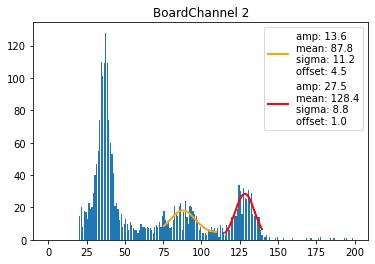

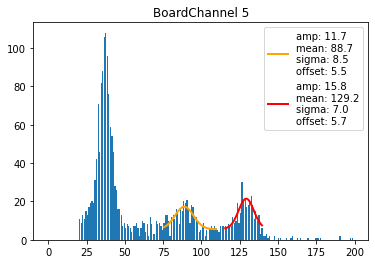

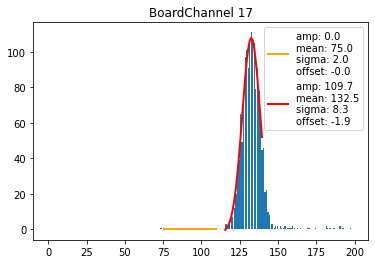

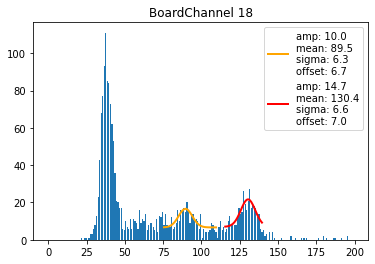

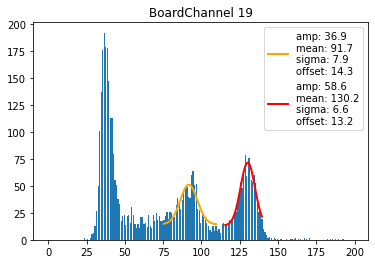

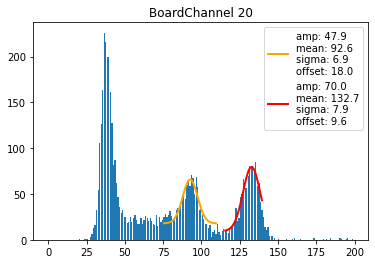

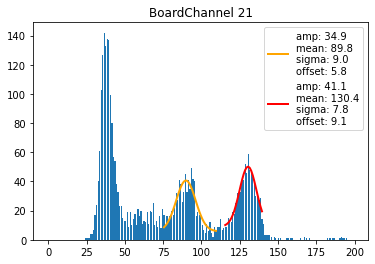

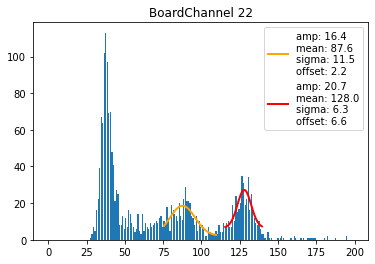

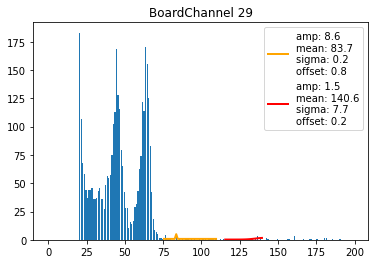

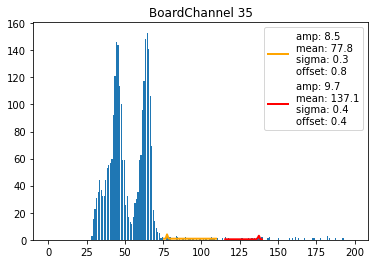

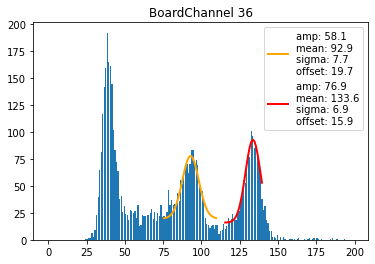

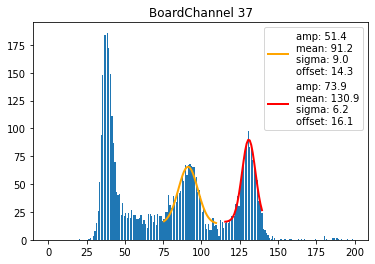

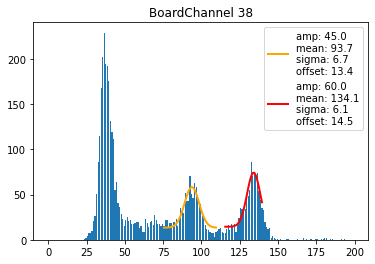

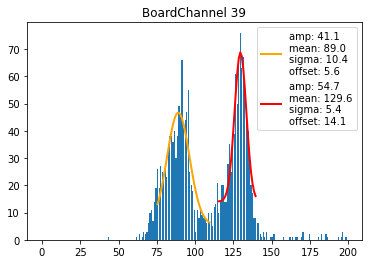

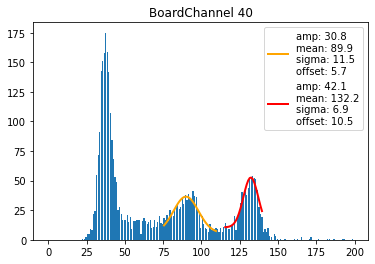

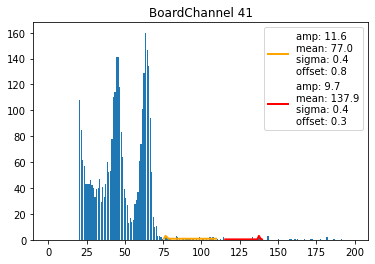

fitting failed
fit failed


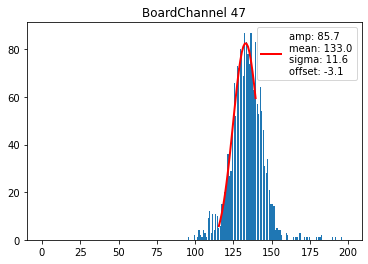

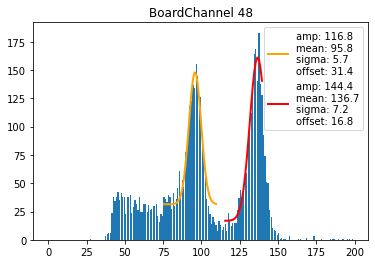

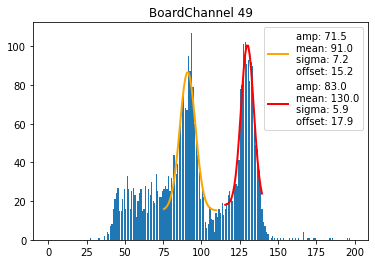

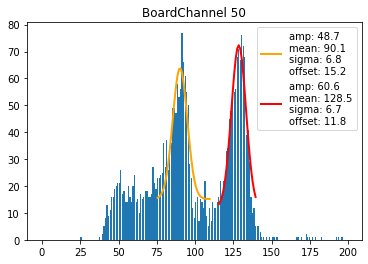

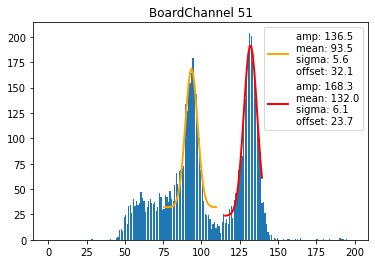

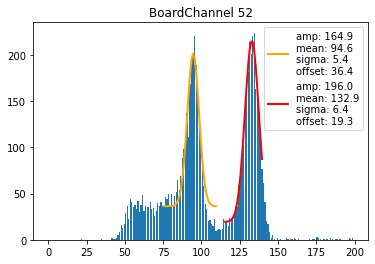

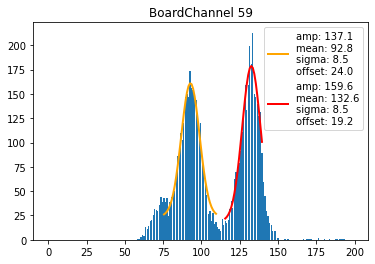

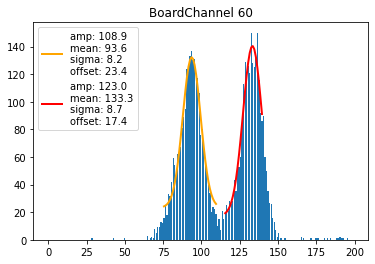

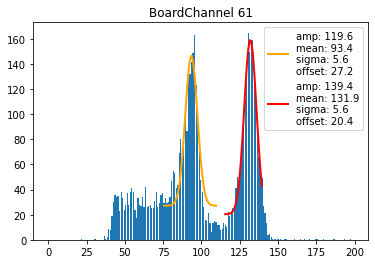

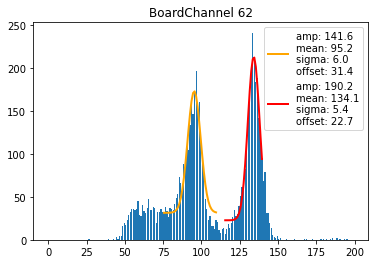

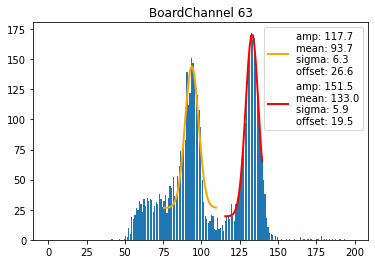

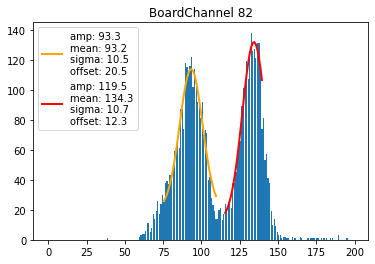

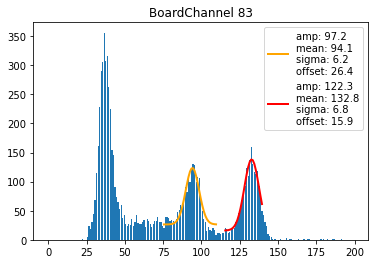

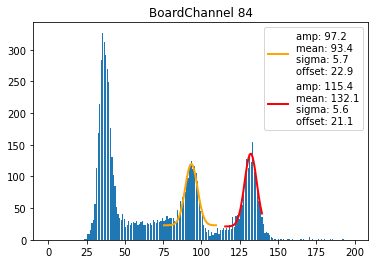

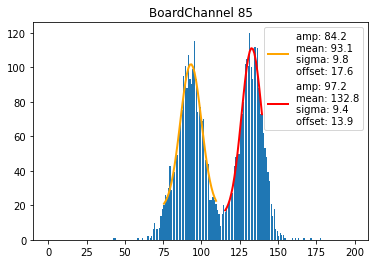

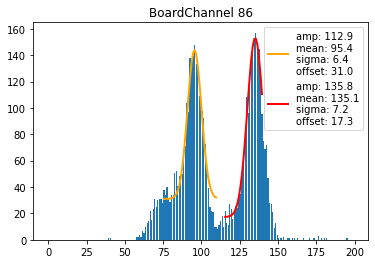

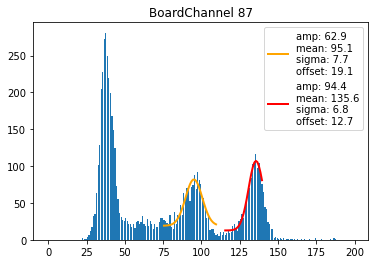

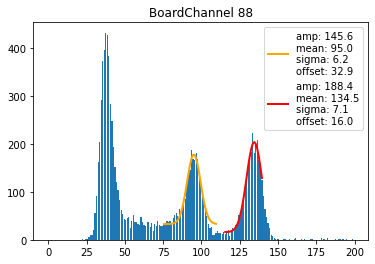

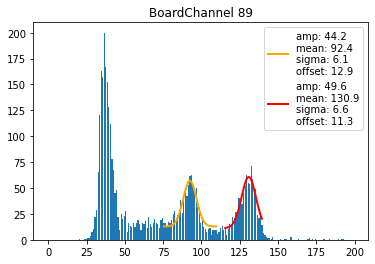

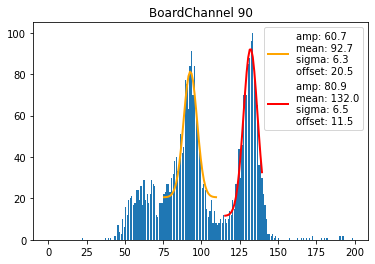

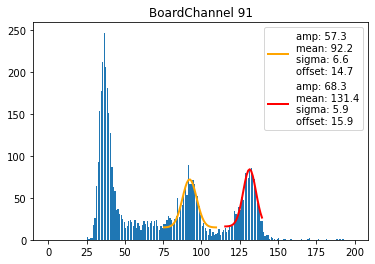

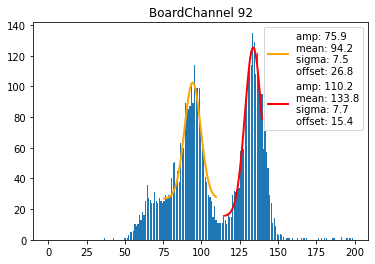

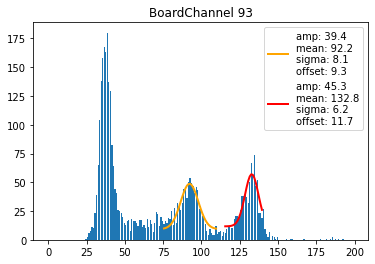

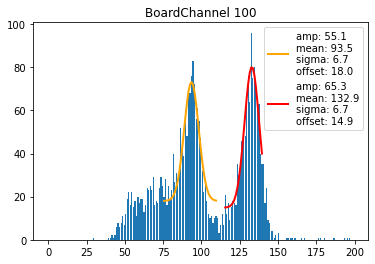

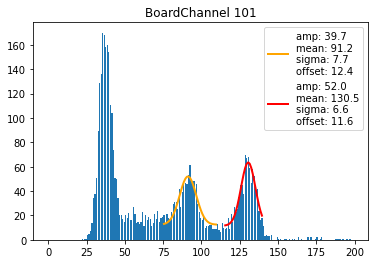

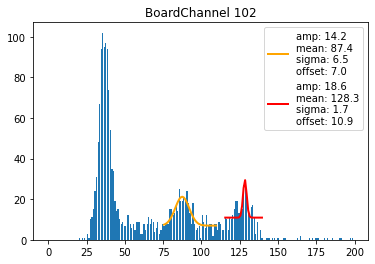

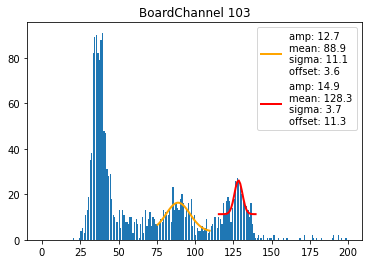

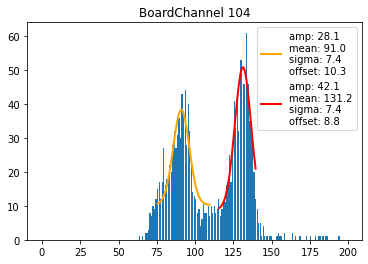

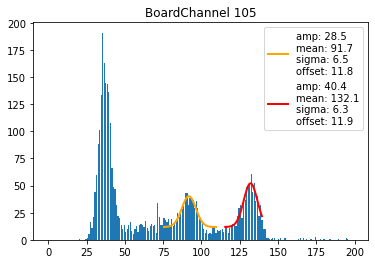

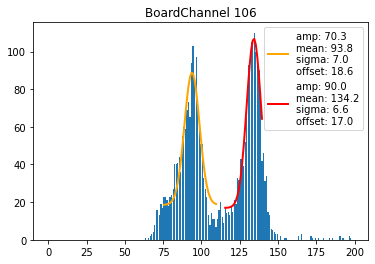

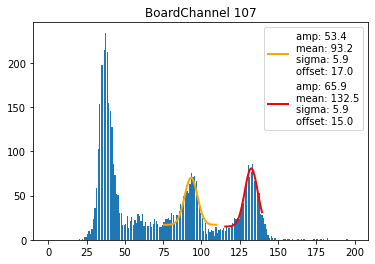

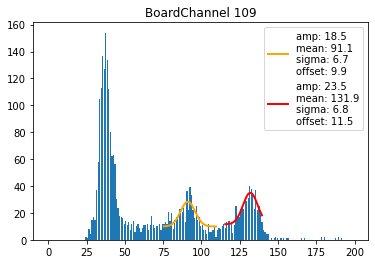

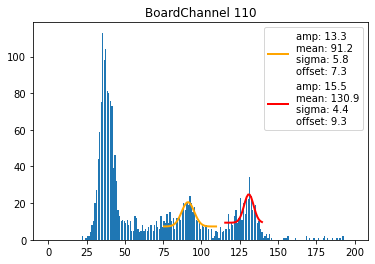

In [15]:
bins = np.arange(0, 200)
peak1window = np.arange(75, 110)
peak2window = np.arange(115, 140)
for i in range(127):
	results.resetCuts()
	results.defineCut('bc', i)
	results.defineCut('energy', '>', 20)
	results.defineCut('t0', 'between', waveformFile.pretrigger-500, waveformFile.pretrigger+500)
	if len(results.data()) > 10:
		results.hist('energy', bins = bins)
		results.title('BoardChannel ' +str(i))
		data = results.data()['energy']
		hist, _ = np.histogram(data, bins = bins)
		peak1_p0 = [np.max(peak1window), np.argmax(hist[peak1window])+np.min(peak1window), 2, 0]
		peak2_p0 = [np.max(peak2window), np.argmax(hist[peak2window])+np.min(peak2window), 2, 0]
		results.fitHist('energy', bins = peak1window, rounding=1, p0=peak1_p0, color='orange', linewidth=2)
		results.fitHist('energy', bins = peak2window, rounding=1, p0=peak2_p0, color='red', linewidth=2)
		results.legend()
		results.savefig('bc'+str(i)+'histFitResults.png')
		results.show()